In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV, Lasso
from matplotlib import pyplot as plt
from scipy.stats import pearsonr as corr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.neural_network import MLPRegressor as MLPR
import tensorflow as tf
%matplotlib inline

In [11]:
dataset = pd.read_csv('OneDrug_train.csv').drop(['ID'], axis = 1)

In [12]:
dataset

,Cell.lines,IC50s,ALK,APC,BRAF,BRCA1,BRCA2,CDH1,CDKN2A,CDKN2C,...,TP53,TSC1,VHL,WT1,BCR_ABL,ETV6_RUNX1,EWS_ERG,EWS_FLI1,MLL_AFF1,TCF3_PBX1
0,MC-CAR,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PFSK-1,3.442371,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,A673,3.726071,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,ES3,2.828106,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,ES5,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,ES7,2.977016,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,EW-11,2.216649,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,NCI-H1395,3.028667,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,COLO-829,2.175860,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,5637,0.014988,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [13]:
dataset['Cell.lines'].value_counts()
# all values unique, not valid for prediction

KGN            1
NCI-H727       1
SK-N-DZ        1
GDM-1          1
NB7            1
NCI-H2122      1
NCI-H1993      1
COLO-800       1
KP-4           1
SR             1
ALL-PO         1
EC-GI-10       1
NCI-H1581      1
MEL-JUSO       1
HCC1954        1
SCC-15         1
MDA-MB-453     1
HEL            1
NB69           1
COR-L88        1
WSU-NHL        1
NCI-N87        1
KS-1           1
L-540          1
Detroit562     1
MRK-nu-1       1
DSH1           1
IGR-1          1
SNU-C2B        1
HTC-C3         1
              ..
MONO-MAC-6     1
SJSA-1         1
SCC-25         1
LB373-MEL-D    1
DEL            1
HH             1
SCC-4          1
HT             1
TYK-nu         1
EW-24          1
NCI-H1573      1
U251           1
HCC70          1
SW1116         1
RL             1
OPM-2          1
HCC1569        1
HL-60          1
GMS-10         1
BT-549         1
A427           1
CCF-STTG1      1
ZR-75-30       1
NCI-H2170      1
COLO-680N      1
BB30-HNC       1
PANC-03-27     1
RCM-1         

# split dataset into training and testing

In [14]:
train_df = dataset[pd.notnull(dataset['IC50s'])]
test_df = dataset[pd.isnull(dataset['IC50s'])]

# try random forest on dataset

In [15]:
randomforest = RandomForestRegressor()
mse_list = []
for _ in range(50):
    train_set, validating_set = train_test_split(train_df, test_size = 0.2)
    randomforest.fit(train_set.drop(['IC50s', 'Cell.lines'], axis = 1), train_set['IC50s'])
    randomforest.predict(validating_set.drop(['IC50s', 'Cell.lines'], axis =1))
    mse_list.append(mse(randomforest.predict(validating_set.drop(['IC50s', 'Cell.lines'], axis =1)), validating_set['IC50s']))

In [16]:
np.array(mse_list).mean()

3.6862464927033316

# 3.746166734796784
# Random forest -- all features
# PCA

In [17]:
# try some PCA on data
ic50_pca = PCA()

In [18]:
pca_df = pd.DataFrame(ic50_pca.fit_transform(train_df.drop(['IC50s', 'Cell.lines'], axis = 1), train_df['IC50s']))

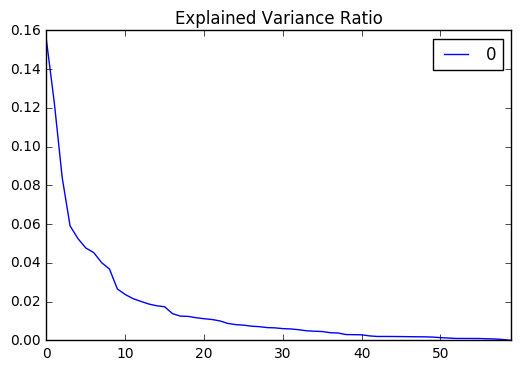

In [19]:
pd.DataFrame(ic50_pca.explained_variance_ratio_).plot(title = 'Explained Variance Ratio') 

# take first 10 components

In [20]:
column_names = []
for _ in range(10):
    column_names.append('pca'+str(_))

In [21]:
ic50_pca = PCA(n_components = 10)
pca_df = pd.DataFrame(ic50_pca.fit_transform(dataset.drop(['IC50s', 'Cell.lines'], axis = 1), dataset['IC50s']),columns=column_names)
pca_df = dataset.join(pca_df)
pca_train = pca_df[pd.notnull(pca_df['IC50s'])]
pca_test = pca_df[pd.isnull(pca_df['IC50s'])]

In [22]:
pcalinear = LinearRegression()
mse_list = []
for _ in range(50):
    train_set, validating_set = train_test_split(pca_train, test_size = 0.2)
    pcalinear.fit(train_set[column_names], train_set['IC50s'])
    mse_list.append(mse(pcalinear.predict(validating_set[column_names]), validating_set['IC50s']))

In [23]:
np.array(mse_list).mean()

3.2128954399512248

# Linear Regression top 10 princal components
# 3.2093371718270345

# -------------------
# Lasso

In [24]:
druglassocv = LassoCV()

In [25]:
druglassocv.fit(train_df.drop(['IC50s', 'Cell.lines'], axis = 1), train_df['IC50s'])

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [26]:
druglassocv.alpha_

0.015303275343321654

In [27]:
lassocv_features = train_df.drop(['IC50s', 'Cell.lines'], axis = 1).columns[druglassocv.coef_ != 0]

In [28]:
for _ in lassocv_features:
    print _

BRAF
CDKN2A
EGFR
ERBB2
JAK2
MYC
NRAS
SMAD4
TP53
VHL
EWS_FLI1


In [29]:
lassocvlinear = LinearRegression()
mse_list = []
for _ in range(500):
    train_set, validating_set = train_test_split(train_df, test_size = 0.2)
    lassocvlinear.fit(train_set[lassocv_features], train_set['IC50s'])
    mse_list.append(mse(lassocvlinear.predict(validating_set[lassocv_features]), validating_set['IC50s']))

In [30]:
np.array(mse_list).mean()

2.8447547029429745

# LASSOCV for parameter selection
# linear regression as model
# 2.8027849921199874
# ----------------------
# LASSOCV + RANDOM FOREST

In [31]:
mse_list = []
for _ in range(50):
    train_set, validating_set = train_test_split(train_df, test_size = 0.2)
    randomforest.fit(train_set[lassocv_features], train_set['IC50s'])
    randomforest.predict(validating_set[lassocv_features])
    mse_list.append(mse(randomforest.predict(validating_set[lassocv_features]), validating_set['IC50s']))

In [32]:
np.array(mse_list).mean()

2.9920623748709607

# LASSO + RANDOM FOREST PERFORMS WORSE THAN LR
# BUT STILL BETTER THAN USING THE WHOLE FEATURE SET
# Feature selection is the key

# !! first submission

In [33]:
FirstSubModel = LinearRegression()
FirstSubModel.fit(train_df[lassocv_features], train_df['IC50s'])
result = pd.DataFrame(FirstSubModel.predict(test_df[lassocv_features]), columns = ['IC50'], index = test_df.index)
result['ID'] = result.index + 1
result = result[['ID', 'IC50']]
result.to_csv('Guangju_1stSub', index = False)

# ------------
# The result was kind of poor and alpha is small, try further reduce some features

In [34]:
druglasso = Lasso(alpha= 0.018)

In [35]:
druglasso.fit(train_df.drop(['IC50s', 'Cell.lines'], axis = 1), train_df['IC50s'])

Lasso(alpha=0.018, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
lasso_features = train_df.drop(['IC50s', 'Cell.lines'], axis = 1).columns[druglasso.coef_ != 0]

In [37]:
for _ in lasso_features:
    print _

BRAF
CDKN2A
EGFR
ERBB2
MYC
NRAS
SMAD4
TP53


In [38]:
lasso_linear0018 = LinearRegression()
mse_list = []
for _ in range(50):
    train_set, validating_set = train_test_split(train_df, test_size = 0.2)
    lasso_linear0018.fit(train_set[lasso_features], train_set['IC50s'])
    lasso_linear0018.predict(validating_set[lasso_features])
    mse_list.append(mse(lasso_linear0018.predict(validating_set[lasso_features]), validating_set['IC50s']))

In [39]:
np.array(mse_list).mean()

2.7086547855135139

# A more stable result obtained.
# This means that the first model used for submission might be overfitted
# Try a even smaller one

In [40]:
druglasso = Lasso(alpha= 0.03)
druglasso.fit(train_df.drop(['IC50s', 'Cell.lines'], axis = 1), train_df['IC50s'])
lasso_features = train_df.drop(['IC50s', 'Cell.lines'], axis = 1).columns[druglasso.coef_ != 0]
lasso_features

Index([u'BRAF', u'EGFR', u'ERBB2', u'MYC', u'NRAS', u'SMAD4', u'TP53'], dtype='object')

In [41]:
lasso_linear0018 = LinearRegression()
mse_list = []
for _ in range(50):
    train_set, validating_set = train_test_split(train_df, test_size = 0.2)
    lasso_linear0018.fit(train_set[lasso_features], train_set['IC50s'])
    lasso_linear0018.predict(validating_set[lasso_features])
    mse_list.append(mse(lasso_linear0018.predict(validating_set[lasso_features]), validating_set['IC50s']))

In [42]:
np.array(mse_list).mean()

2.8449726597984695

# Time for second submission
# feature set of length 7

In [43]:
SecondSubModel = LinearRegression()
SecondSubModel.fit(train_df[lasso_features], train_df['IC50s'])
result = pd.DataFrame(SecondSubModel.predict(test_df[lasso_features]), columns = ['IC50'], index = test_df.index)
result['ID'] = result.index + 1
result = result[['ID', 'IC50']]
result.to_csv('Guangju_2ndSub', index = False)

# the result is indeed better, try more stuff tomorrowlas
# Gradient Boosting Regressor

In [44]:
mse_list = []
for _ in range(50):
    train_set, validating_set = train_test_split(train_df, test_size = 0.2)
    ic50gbr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=2, random_state=0, loss='ls').fit(train_set.drop(['IC50s', 'Cell.lines'], axis = 1), train_set['IC50s'])
    mse_list.append(mse(validating_set['IC50s'], ic50gbr.predict(validating_set.drop(['IC50s','Cell.lines'], axis = 1))))

In [45]:
np.array(mse_list).mean()

2.8816892195911783

# On the whole feature set, GBR performs better than linear regression. 
# This may indicate some non-linearity of the data

In [46]:
mse_list = []
for _ in range(50):
    train_set, validating_set = train_test_split(train_df, test_size = 0.2)
    ic50gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=1, random_state=0, loss='ls').fit(train_set[lasso_features], train_set['IC50s'])
    mse_list.append(mse(validating_set['IC50s'], ic50gbr.predict(validating_set[lasso_features])))

In [47]:
np.array(mse_list).mean()

2.8591752501527896

# The result was not improved by reducing the size of the feature set. This means that GBR is less sensitive to feature set.
# In fact, when run the second time, GBR performed better.
# But how can we improve the result of GBR?

In [48]:
ThirdSubModel = RandomForestRegressor()
ThirdSubModel.fit(train_df[lasso_features], train_df['IC50s'])
result = pd.DataFrame(ThirdSubModel.predict(test_df[lasso_features]), columns = ['IC50'], index = test_df.index)
result['ID'] = result.index + 1
result = result[['ID', 'IC50']]
result.to_csv('Guangju_3rdSub', index = False)

# 3.22281
# counted for Non-Linearity but no improve
# Go back to parameter selection

In [49]:
druglasso = Lasso(alpha= 0.03)
druglasso.fit(train_df.drop(['IC50s', 'Cell.lines'], axis = 1), train_df['IC50s'])
lasso_features = train_df.drop(['IC50s', 'Cell.lines'], axis = 1).columns[druglasso.coef_ != 0]
lasso_features

Index([u'BRAF', u'EGFR', u'ERBB2', u'MYC', u'NRAS', u'SMAD4', u'TP53'], dtype='object')

In [50]:
lasso_linear0018 = LinearRegression()
mse_list = []
for _ in range(500):
    train_set, validating_set = train_test_split(train_df, test_size = 0.2)
    lasso_linear0018.fit(train_set[lasso_features], train_set['IC50s'])
    mse_list.append(mse(lasso_linear0018.predict(validating_set[lasso_features]), validating_set['IC50s']))
np.array(mse_list).mean()

2.8073446125775208

109 109


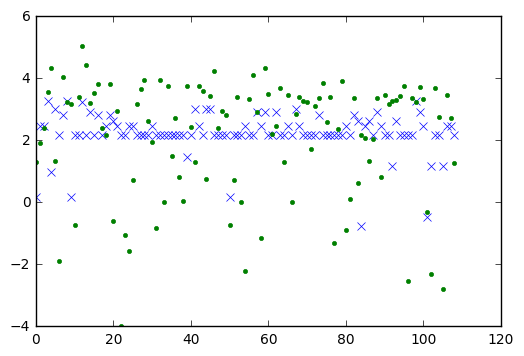

In [51]:
train_set, validating_set = train_test_split(train_df, test_size = 0.2)
lasso_linear0018.fit(train_set[lasso_features], train_set['IC50s'])
t = range(len(validating_set))
print len(validating_set), len(lasso_linear0018.predict(validating_set[lasso_features]))
plt.plot(t, lasso_linear0018.predict(validating_set[lasso_features]), 'x', t, validating_set['IC50s'], '.')

# To include some non linearity, use KNN to fit locally.

In [52]:
# ic50knn = KNNR(n_neighbors = 100, weights='distance')
# mse_list = []
# for _ in range(500):
#     train_set, validating_set = train_test_split(train_df, test_size = 0.2)
#     ic50knn.fit(train_set[lassocv_features], train_set['IC50s'])
#     ic50knn.predict(validating_set[lassocv_features])
#     mse_list.append(mse(ic50knn.predict(validating_set[lassocv_features]), validating_set['IC50s']))
# np.array(mse_list).mean()

# Not so good

# The fitted result is biased for positive values. But not powerful for negative values. We then try to first classify the data in to positive and negative arbitrarily

# Predict the residual of the Model

In [56]:
FifthSubModel = MLPR(activation='logistic', alpha = 0.001, max_iter= 1000)
FifthSubModel.fit(train_df[lasso_features], train_df['IC50s'])
result = pd.DataFrame(FifthSubModel.predict(test_df[lasso_features]), columns = ['IC50'], index = test_df.index)
result['ID'] = result.index + 1
result = result[['ID', 'IC50']]
result.to_csv('Guangju_5thSub', index = False)